In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [142]:
train=pd.read_excel('Flight_Price_Train.xlsx')
test=pd.read_excel('Flight_Price_Test.xlsx')

In [8]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [97]:
print(train.shape,test.shape)

(10683, 11) (2671, 10)


In [11]:
print(train.columns,test.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object') Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [143]:
#Check Duplicate
train.duplicated().sum()

220

In [144]:
# dropping duplicate values 
train.drop_duplicates(keep=False,inplace=True) 

In [145]:
#Check Duplicate
test.duplicated().sum()

26

In [146]:
# dropping duplicate values 
test.drop_duplicates(keep=False,inplace=True) 

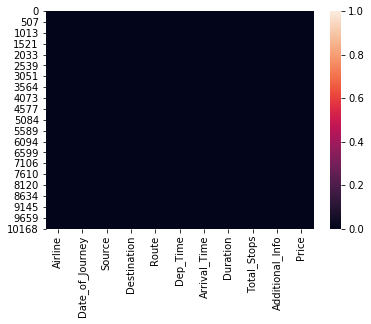

In [102]:
#To check missing value
sns.heatmap(train.isnull())

In [147]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [148]:
train = train.dropna(axis = 0)

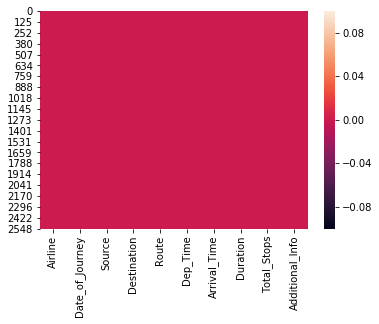

In [105]:
#To check missing value
sns.heatmap(test.isnull())

In [106]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [150]:
data=pd.concat([train,test]) 

In [151]:
data.nunique()

Additional_Info      10
Airline              12
Arrival_Time       1445
Date_of_Journey      44
Dep_Time            223
Destination           6
Duration            373
Price              1862
Route               132
Source                5
Total_Stops           5
dtype: int64

In [109]:
#Additional_Info 
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

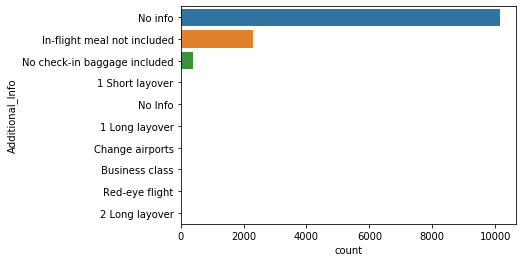

In [110]:
sns.countplot(y='Additional_Info',data=data)

In [92]:
#Airline
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

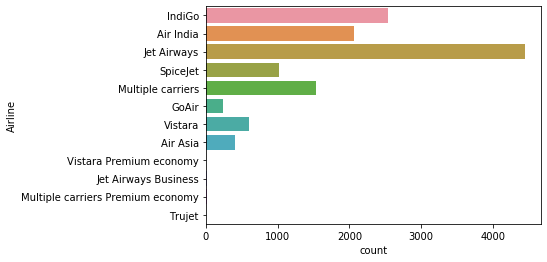

In [93]:
sns.countplot(y='Airline',data=data)

In [94]:
#Destination
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

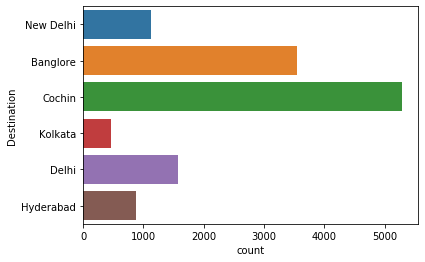

In [36]:
sns.countplot(y='Destination',data=data)

In [37]:
#Source 
data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

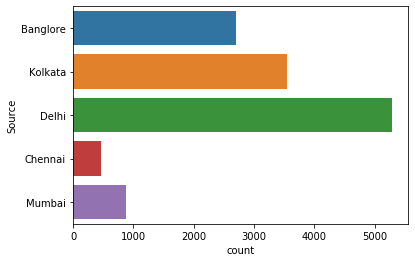

In [38]:
sns.countplot(y='Source',data=data)

In [39]:
#Total_Stops
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

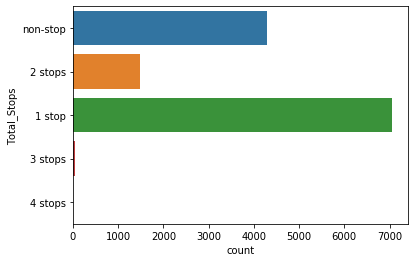

In [40]:
sns.countplot(y='Total_Stops',data=data)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

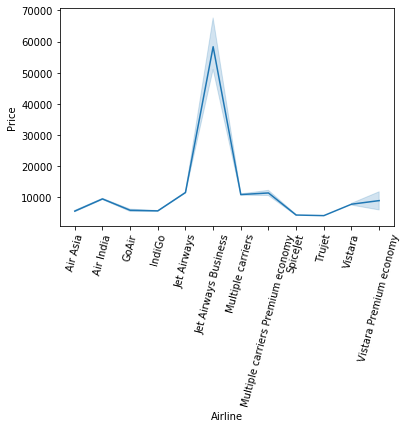

In [52]:
sns.lineplot(y='Price',x='Airline',data=data)
plt.xticks(rotation=75)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

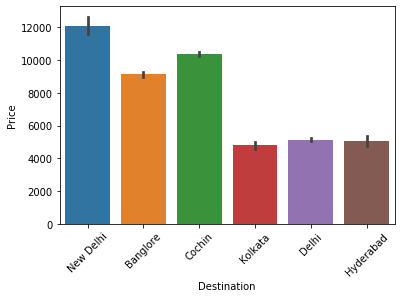

In [60]:
sns.barplot(y='Price',x='Destination',data=data)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

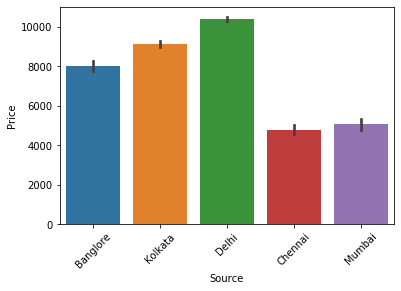

In [67]:
sns.barplot(y='Price',x='Source',data=data)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

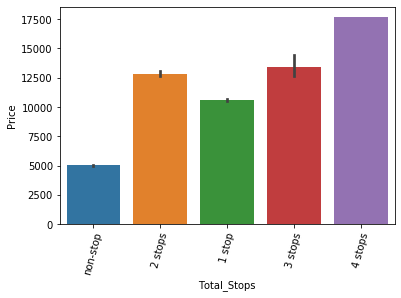

In [75]:
sns.barplot(y='Price',x='Total_Stops',data=data)
plt.xticks(rotation=75)

In [152]:
#Date_of_Journey
train["Date"]=train['Date_of_Journey'].str.split('/').str[0]
train["Month"]=train['Date_of_Journey'].str.split('/').str[1]
train["Year"]=train['Date_of_Journey'].str.split('/').str[2]
train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

test["Date"]=test['Date_of_Journey'].str.split('/').str[0]
test["Month"]=test['Date_of_Journey'].str.split('/').str[1]
test["Year"]=test['Date_of_Journey'].str.split('/').str[2]
test.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [153]:
#Depart_Time and Arrival_Time
train['Depart_Time_Hour'] = pd.to_datetime(train.Dep_Time).dt.hour
train['Depart_Time_Minutes'] = pd.to_datetime(train.Dep_Time).dt.minute
train.drop(labels = 'Dep_Time', axis = 1, inplace = True)
train['Arr_Time_Hour'] = pd.to_datetime(train.Arrival_Time).dt.hour
train['Arr_Time_Minutes'] = pd.to_datetime(train.Arrival_Time).dt.minute
train['Arr_Time_Minutes'] = pd.to_datetime(train.Arrival_Time).dt.day
train['Arr_Time_Minutes'] = pd.to_datetime(train.Arrival_Time).dt.month
train.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

test['Depart_Time_Hour'] = pd.to_datetime(test.Dep_Time).dt.hour
test['Depart_Time_Minutes'] = pd.to_datetime(test.Dep_Time).dt.minute
test.drop(labels = 'Dep_Time', axis = 1, inplace = True)
test['Arr_Time_Hour'] = pd.to_datetime(test.Arrival_Time).dt.hour
test['Arr_Time_Minutes'] = pd.to_datetime(test.Arrival_Time).dt.minute
test['Arr_Time_Minutes'] = pd.to_datetime(test.Arrival_Time).dt.day
test['Arr_Time_Minutes'] = pd.to_datetime(test.Arrival_Time).dt.month
test.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [154]:
#Total_Stops
train['Total_Stops']=train['Total_Stops'].replace('non-stop','0 stop')
train['Stop']=train['Total_Stops'].str.split(' ').str[0]
train.drop(labels = 'Total_Stops', axis = 1, inplace = True)

test['Total_Stops']=test['Total_Stops'].replace('non-stop','0 stop')
test['Stop']=test['Total_Stops'].str.split(' ').str[0]
test.drop(labels = 'Total_Stops', axis = 1, inplace = True)

In [155]:
#train.drop(labels = 'Route', axis = 1, inplace = True)
#test.drop(labels = 'Route', axis = 1, inplace = True)

In [156]:
train.drop(labels = 'Duration', axis = 1, inplace = True)
test.drop(labels = 'Duration', axis = 1, inplace = True)

In [157]:
train.head(2)

,Airline,Source,Destination,Route,Additional_Info,Price,Date,Month,Year,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,03,2019,22,20,1,3,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,05,2019,5,50,13,4,2


In [159]:
test.head(2)

,Airline,Source,Destination,Route,Additional_Info,Date,Month,Year,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Stop
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,No info,6,06,2019,17,30,4,6,1
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,No info,12,05,2019,6,20,10,4,1


Label Encoder

In [160]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 

In [161]:
train['Airline']= le.fit_transform(train['Airline']) 
train['Source']= le.fit_transform(train['Source'])
train['Destination']= le.fit_transform(train['Destination'])
train['Additional_Info']= le.fit_transform(train['Additional_Info'])
train['Year']= le.fit_transform(train['Year'])

test['Airline']= le.fit_transform(test['Airline']) 
test['Source']= le.fit_transform(test['Source']) 
test['Destination']= le.fit_transform(test['Destination']) 
test['Additional_Info']= le.fit_transform(test['Additional_Info']) 
test['Year']= le.fit_transform(test['Year']) 

In [162]:
train['Route']= le.fit_transform(train['Route'])
test['Route']= le.fit_transform(test['Route'])

In [166]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 2670
Data columns (total 13 columns):
Airline                2619 non-null int32
Source                 2619 non-null int32
Destination            2619 non-null int32
Route                  2619 non-null int32
Additional_Info        2619 non-null int32
Date                   2619 non-null object
Month                  2619 non-null object
Year                   2619 non-null int32
Depart_Time_Hour       2619 non-null int64
Depart_Time_Minutes    2619 non-null int64
Arr_Time_Hour          2619 non-null int64
Arr_Time_Minutes       2619 non-null int64
Stop                   2619 non-null object
dtypes: int32(6), int64(4), object(3)
memory usage: 225.1+ KB


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10267 entries, 0 to 10682
Data columns (total 14 columns):
Airline                10267 non-null int32
Source                 10267 non-null int32
Destination            10267 non-null int32
Route                  10267 non-null int32
Additional_Info        10267 non-null int32
Price                  10267 non-null int64
Date                   10267 non-null object
Month                  10267 non-null object
Year                   10267 non-null int32
Depart_Time_Hour       10267 non-null int64
Depart_Time_Minutes    10267 non-null int64
Arr_Time_Hour          10267 non-null int64
Arr_Time_Minutes       10267 non-null int64
Stop                   10267 non-null object
dtypes: int32(6), int64(5), object(3)
memory usage: 962.5+ KB


In [167]:
train["Date"] = train["Date"].astype(str).astype(int)
train["Month"] = train["Month"].astype(str).astype(int)
train["Year"] = train["Year"].astype(str).astype(int)
train["Stop"] = train["Stop"].astype(str).astype(int)

In [168]:
test["Date"] = test["Date"].astype(str).astype(int)
test["Month"] = test["Month"].astype(str).astype(int)
test["Year"] = test["Year"].astype(str).astype(int)
test["Stop"] = train["Stop"].astype(str).astype(int)

In [169]:
train.drop(labels = 'Year', axis = 1, inplace = True)
test.drop(labels = 'Year', axis = 1, inplace = True)

In [170]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 2670
Data columns (total 12 columns):
Airline                2619 non-null int32
Source                 2619 non-null int32
Destination            2619 non-null int32
Route                  2619 non-null int32
Additional_Info        2619 non-null int32
Date                   2619 non-null int32
Month                  2619 non-null int32
Depart_Time_Hour       2619 non-null int64
Depart_Time_Minutes    2619 non-null int64
Arr_Time_Hour          2619 non-null int64
Arr_Time_Minutes       2619 non-null int64
Stop                   2520 non-null float64
dtypes: float64(1), int32(7), int64(4)
memory usage: 194.4 KB


In [172]:
test.Stop.unique()

array([ 0.,  2.,  1., nan,  3.])

In [173]:
test.isnull().sum()

Airline                 0
Source                  0
Destination             0
Route                   0
Additional_Info         0
Date                    0
Month                   0
Depart_Time_Hour        0
Depart_Time_Minutes     0
Arr_Time_Hour           0
Arr_Time_Minutes        0
Stop                   99
dtype: int64

In [174]:
test= test.dropna(axis = 0)

In [176]:
#Check Skewness
train.skew()

Airline                0.716525
Source                -0.416284
Destination            1.208785
Route                 -0.464774
Additional_Info       -1.812518
Price                  1.898154
Date                   0.130118
Month                 -0.369000
Depart_Time_Hour       0.103590
Depart_Time_Minutes    0.177835
Arr_Time_Hour         -0.387376
Arr_Time_Minutes       0.847414
Stop                   0.339346
dtype: float64

In [177]:
for col in train.columns:
    if train.skew().loc[col] > 0.55:
        train[col]=np.log1p(train[col])
    if train.skew().loc[col] < -0.55:
        train[col]=np.square(train[col])

In [178]:
train.skew()

Airline                0.370743
Source                -0.416284
Destination            0.270652
Route                 -0.464774
Additional_Info       -1.561826
Price                 -0.204284
Date                   0.130118
Month                 -0.369000
Depart_Time_Hour       0.103590
Depart_Time_Minutes    0.177835
Arr_Time_Hour         -0.387376
Arr_Time_Minutes       0.455582
Stop                   0.339346
dtype: float64

In [179]:
#Check Skewness
test.skew()

Airline                0.482954
Source                -0.425959
Destination            1.261061
Route                 -0.272400
Additional_Info       -1.707063
Date                   0.209267
Month                 -0.394003
Depart_Time_Hour       0.075433
Depart_Time_Minutes    0.126278
Arr_Time_Hour         -0.460949
Arr_Time_Minutes       0.828023
Stop                   0.273099
dtype: float64

In [180]:
for col in test.columns:
    if test.skew().loc[col] > 0.55:
        test[col]=np.log1p(test[col])
    if test.skew().loc[col] < -0.55:
        test[col]=np.square(test[col])

In [181]:
test.skew()

Airline                0.482954
Source                -0.425959
Destination            0.277436
Route                 -0.272400
Additional_Info       -1.623207
Date                   0.209267
Month                 -0.394003
Depart_Time_Hour       0.075433
Depart_Time_Minutes    0.126278
Arr_Time_Hour         -0.460949
Arr_Time_Minutes       0.441054
Stop                   0.273099
dtype: float64

Plotting Outliers

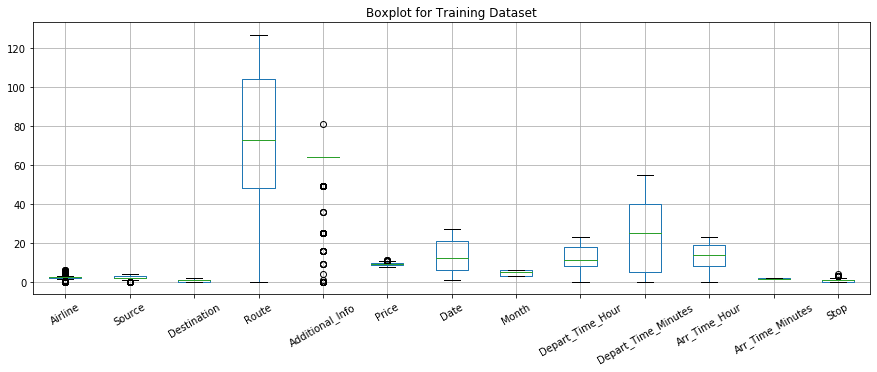

In [182]:
train.plot(kind='box',grid=True,title="Boxplot for Training Dataset",legend=True,rot=30,figsize=(15,5))

In [183]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(train))
print(train.shape)
train=train.loc[(z_score < 3).all(axis=1)]
print(train.shape)

(10267, 13)
(10194, 13)


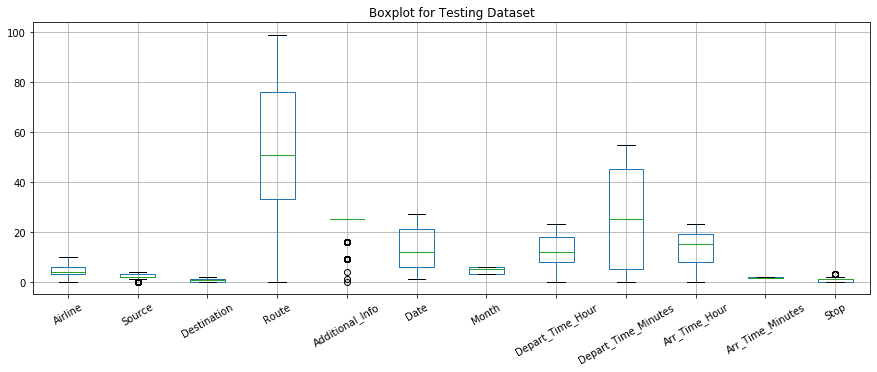

In [185]:
test.plot(kind='box',grid=True,title="Boxplot for Testing Dataset",legend=True,rot=30,figsize=(15,5))

In [186]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(test))
print(test.shape)
test=test.loc[(z_score < 3).all(axis=1)]
print(test.shape)

(2520, 12)
(2511, 12)


In [51]:
train.describe()

,Airline,Source,Destination,Route,Additional_Info,Price,Date,Month,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Stop
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,2.486826,1.960565,0.724609,73.936433,56.323033,8.968452,13.463410,4.700412,12.487836,24.327546,13.417697,1.515977,0.772219
std,1.437040,1.192053,0.564982,36.537294,15.152093,0.510665,8.443096,1.160227,5.711610,18.848342,6.852609,0.212517,0.631671
min,0.000000,0.000000,0.000000,0.000000,16.000000,7.473069,1.000000,3.000000,0.000000,0.000000,0.000000,1.386294,0.000000
25%,1.921812,2.000000,0.000000,48.000000,64.000000,8.555067,6.000000,3.000000,8.000000,5.000000,8.000000,1.386294,0.000000
50%,2.590290,2.000000,0.693147,73.000000,64.000000,8.992309,12.000000,5.000000,11.000000,25.000000,14.000000,1.386294,1.000000
75%,2.590290,3.000000,1.098612,104.000000,64.000000,9.408617,21.000000,6.000000,18.000000,40.000000,19.000000,1.791759,1.000000
max,6.174761,4.000000,1.791759,127.000000,81.000000,10.518241,27.000000,6.000000,23.000000,55.000000,23.000000,1.945910,2.000000


In [52]:
train.corr()

,Airline,Source,Destination,Route,Additional_Info,Price,Date,Month,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Stop
Airline,1.000000,-0.008978,0.021453,0.040747,-0.101656,-0.035226,0.027248,0.031115,-0.033407,-0.063607,-0.007457,-0.071892,-0.177131
Source,-0.008978,1.000000,-0.620007,0.399316,-0.045235,0.024664,-0.001186,0.172837,0.061256,-0.052661,0.030276,0.199436,0.204091
Destination,0.021453,-0.620007,1.000000,-0.340416,0.067816,-0.206679,-0.003238,-0.278955,-0.109889,0.100969,-0.058709,-0.315394,-0.301259
Route,0.040747,0.399316,-0.340416,1.000000,0.029100,0.240177,0.071670,0.221286,-0.074418,-0.070009,0.028608,0.216977,0.440686
Additional_Info,-0.101656,-0.045235,0.067816,0.029100,1.000000,-0.067538,-0.037777,-0.068214,-0.070633,-0.003185,0.019592,-0.169932,-0.075574
Price,-0.035226,0.024664,-0.206679,0.240177,-0.067538,1.000000,-0.128564,-0.071379,-0.006783,-0.062625,0.076399,0.250681,0.696959
Date,0.027248,-0.001186,-0.003238,0.071670,-0.037777,-0.128564,1.000000,-0.045366,-0.008908,0.001659,-0.001616,-0.043018,-0.022515
Month,0.031115,0.172837,-0.278955,0.221286,-0.068214,-0.071379,-0.045366,1.000000,0.043346,-0.062487,0.007004,0.408909,0.028159
Depart_Time_Hour,-0.033407,0.061256,-0.109889,-0.074418,-0.070633,-0.006783,-0.008908,0.043346,1.000000,-0.007232,-0.009380,0.399814,-0.064099
Depart_Time_Minutes,-0.063607,-0.052661,0.100969,-0.070009,-0.003185,-0.062625,0.001659,-0.062487,-0.007232,1.000000,0.049857,-0.052966,-0.007181


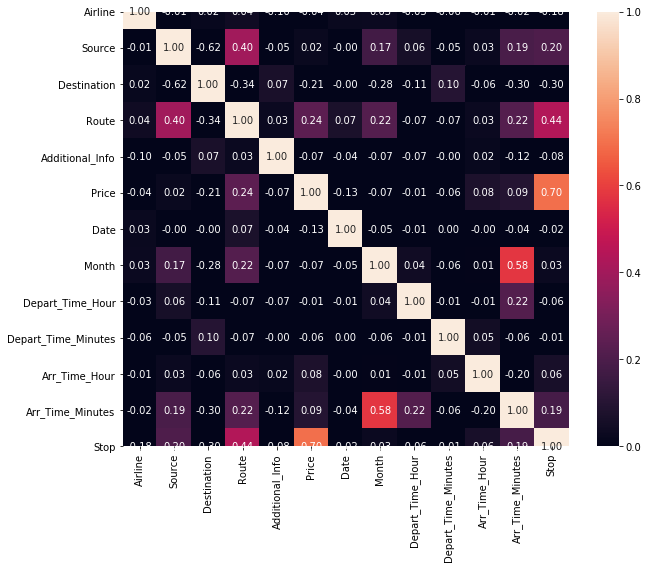

In [130]:
#showing the corelation with a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True,fmt='.2f',vmax=1,vmin=0)
plt.show()

Features and Target Value

In [187]:
x=train.drop("Price",axis=1)
y=train["Price"]

In [188]:
x.head(2)

,Airline,Source,Destination,Route,Additional_Info,Date,Month,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Stop
0,1.921812,0,1.791759,18,64,24,3,22,20,1,1.386294,0
1,0.480453,3,0.000000,84,64,1,5,5,50,13,1.609438,2


In [189]:
y.head(2)

0    8.268219
1    8.944159
Name: Price, dtype: float64

In [190]:
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(10194, 1)

Standardisation

In [191]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x


array([[-0.39319843, -1.6447773 ,  1.88891361, ..., -1.81220113,
        -1.82548515, -1.2225616 ],
       [-1.39625338,  0.87201342, -1.28259605, ..., -0.06095739,
        -0.29907664,  1.9437984 ],
       [ 0.07200177,  0.03308318, -0.05568864, ..., -1.37439019,
         2.00255422,  1.9437984 ],
       ...,
       [ 0.07200177, -1.6447773 ,  0.66200619, ..., -0.35283135,
        -0.29907664, -1.2225616 ],
       [ 2.27080422, -1.6447773 ,  1.88891361, ...,  0.08497959,
        -0.29907664, -1.2225616 ],
       [-1.39625338,  0.03308318, -0.05568864, ...,  0.81466448,
        -0.29907664,  1.9437984 ]])

Spilt Train and Test

In [192]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [193]:
def mod(model,x,y):
    max_r=0
    for i in range(30,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    print()
    print('prediction: ',pred)
    return random_state

LinearRegression

In [61]:
lr=LinearRegression()
mod(lr,x,y)

the random state at  <function mod at 0x00000075D9FBD678> 
is:  53 
and it produces 
 r2 score of  0.5418264448439887 
 mean abs error value of  0.28542872449059087 
 mean squared error value of 0.12144661698804608 
 & root mean sq error  0.34849191811008484

prediction:  [[9.06880894]
 [9.30722525]
 [9.35857574]
 ...
 [8.65182964]
 [8.3711079 ]
 [8.2875416 ]]


53

In [62]:
#cross validation
lr_scr=cross_val_score(lr,x,y,cv=10,scoring='r2')
print('the r2 score at liner regression model is=', lr_scr.mean())

the r2 score at liner regression model is= 0.5484384192874713


Decision Tree Regressor

In [63]:
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse','mae'],'max_depth':[6,8,9]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=10)
dtr_grid.fit(x,y)
dtr_grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 9}

In [64]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=9)
mod(dtr,x,y)

the random state at  <function mod at 0x00000075D9FBD678> 
is:  147 
and it produces 
 r2 score of  0.8973002509376673 
 mean abs error value of  0.10595368003475412 
 mean squared error value of 0.027222298076314287 
 & root mean sq error  0.1649918121493133

prediction:  [8.78995486 9.47834956 9.07423036 ... 8.46046802 8.1824766  7.59941984]


147

In [65]:
#Cross Validation
dtr_scr=cross_val_score(dtr,x,y,cv=10,scoring='r2')
print('the r2 score at DTR model is=', dtr_scr.mean())

the r2 score at DTR model is= 0.8998590320824322


KNeighbors Regressor

In [66]:
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute','auto']}
k_grid=GridSearchCV(knr,k_para,cv=20)
k_grid.fit(x,y)
k_grid.best_params_

{'algorithm': 'brute', 'n_neighbors': 4}

In [69]:
knr=KNeighborsRegressor(algorithm='brute',n_neighbors=4)
mod(knr,x,y)

the random state at  <function mod at 0x00000075D9FBD678> 
is:  143 
and it produces 
 r2 score of  0.8407885757814842 
 mean abs error value of  0.13071866130553056 
 mean squared error value of 0.04220166930106532 
 & root mean sq error  0.20543044881678402

prediction:  [[9.10873545]
 [9.43254117]
 [9.05518926]
 ...
 [8.54144217]
 [8.17301131]
 [7.60333573]]


143

In [70]:
#Cross Validation
knr_scr=cross_val_score(knr,x,y,cv=20,scoring='r2')
print('the r2 score at KNR model is=', knr_scr.mean())

the r2 score at KNR model is= 0.8649781290338142


Random Forest Regressor

In [82]:
rf=RandomForestRegressor()
rf_para={'criterion':['mse','mae'],'max_depth':[6,8,9],'n_estimators' : [100]}
rf_grid=GridSearchCV(rf,rf_para,cv=10)
rf_grid.fit(x,y)
rf_grid.best_params_

{'criterion': 'mse', 'max_depth': 9, 'n_estimators': 100}

In [83]:
rf=RandomForestRegressor(criterion='mse',max_depth=9,n_estimators=100)
mod(rf,x,y)

the random state at  <function mod at 0x00000075D0D3B948> 
is:  143 
and it produces 
 r2 score of  0.9179457869228003 
 mean abs error value of  0.10011036145285414 
 mean squared error value of 0.021749851067788015 
 & root mean sq error  0.1474783071091746

prediction:  [8.89387518 9.45382782 9.08815301 ... 8.43270835 8.19278779 7.61225212]


143

In [84]:
#Cross Validation
rf_scr=cross_val_score(rf,x,y,cv=10,scoring='r2')
print('the r2 score at Random Forest Regressor model is=', rf_scr.mean())

the r2 score at Random Forest Regressor model is= 0.9195967862240412


AdaBoost Regressor

In [73]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

ada_param= {"learning_rate": [0.0001,0.025,0.1,1.0],"n_estimators":[250,500,750,1000]}

ada_g= GridSearchCV(ada,ada_param,cv=10)
ada_g.fit(x_train,y_train)
print("best parameters:", ada_g.best_params_)
print("\n best score:",ada_g.best_score_)

best parameters: {'learning_rate': 0.025, 'n_estimators': 500}

 best score: 0.6988893896644581


In [74]:
ada=AdaBoostRegressor(learning_rate=0.025, n_estimators=500)
mod(ada,x,y)

the random state at  <function mod at 0x00000075D9FBD678> 
is:  51 
and it produces 
 r2 score of  0.6921536489230506 
 mean abs error value of  0.23202813555578336 
 mean squared error value of 0.08159985985589967 
 & root mean sq error  0.28565689184036797

prediction:  [9.21067548 9.33019156 9.19055758 ... 8.51227073 8.50488179 8.12581833]


51

In [75]:
#Cross Validation
ada_scr=cross_val_score(ada,x,y,cv=10,scoring='r2')
print('the r2 score at AdaBoost Reg model is=', ada_scr.mean())

the r2 score at AdaBoost Reg model is= 0.6958480413981982


In [194]:
import joblib
joblib.dump(rf,"RF_FlightPrice.pkl")

['RF_FlightPrice.pkl']

In [198]:
# Load the model from the file
model = joblib.load('RF_FlightPrice.pkl') 
# Use the loaded model to make predictions 
model.predict(test)

array([8.5476109 , 8.5476109 , 8.5476109 , ..., 8.5476109 , 8.92269545,
       8.5476109 ])